In [24]:
#start game with range of 1 to n where n is an even number
#randomly assign "Positive" outcomes to 50%


import random 



def initialize_game(n):
    #check n is even
    assert n% 2 == 0
    from random import randrange
    
    numbers = range(1,n+1)
    winning_numbers=range(1,n+1,2)
    

    
    choice_dict = {}
    
# Add values to `new_dict` using for loop
    for i in numbers:
            choice_dict['Choice '+str(i)]= 'Lose'
            #if i == random_no:
            for i in winning_numbers:
                choice_dict['Choice '+str(i)] = 'Win'
    return choice_dict

In [25]:
#define function to delete items from dictionary
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
            
            


In [26]:
import random

#the object here is to simulate the EU 
#seeing a selection of "negative" choices (k) and being able to avoid them
#the k negative choices once revealed are removed from selection

def monty_opens(choice_dict, player_choice, k):
    assert type(choice_dict) is dict, "input variable choice_dict should be a dictionary"
    #assert k <= len(choice_dict) - 2, "Incorrect number of choices to be opened in dictionary"


    dummary_dict=choice_dict.copy()
    ext = 'Choice '



#1. check whether player picked a loss or a win
    
    
    player_choice_key=(ext + str(player_choice))


    player_choice_v= {x: y for x, y in choice_dict.items() if x==player_choice_key}


#2. find out which choice has car behind it
    win_choice_v = {x: y for x, y in choice_dict.items() if y=='Win'}

#Case 1, k out of remaining n-2
#create temp dict removing  player choice and wins



    if choice_dict.get(player_choice_key)=='Lose':
        player_choice_v= [x for x, y in choice_dict.items() if x==player_choice_key]

        win_choice_vb = [x for x, y in choice_dict.items() if y=='Win']
        win_choice_v=''.join(map(str, [win_choice_vb]))

        ext = 'Choice '
        player_choice=(ext + str(player_choice))
        player_choice_dict= {x : y for x, y in choice_dict.items() if x==player_choice_key}
        win_choice_dict = {x : y for x, y in choice_dict.items() if y=='Win'}
        player_choice_dict.update(win_choice_dict) 
         

    #removing players choice and also winning choices from k
        del dummary_dict[player_choice_key]
        entries_to_remove(eval(win_choice_v),dummary_dict)
    
    
    
#at this point want to delete k entries 
        for key in random.sample(dummary_dict.keys(), k):
            del dummary_dict[key]     
        
    #at this point add back in winning choices and player choice
        dummary_dict.update(player_choice_dict) 
        choice_dict=dummary_dict
    
#case 2, k out of remaining n-1
    elif choice_dict.get(player_choice_key)=='Win':
    
       
    
        win_choice_vb = [x for x, y in choice_dict.items() if y=='Win']
        win_choice_v=''.join(map(str, [win_choice_vb]))
        win_choice_dict = {x : y for x, y in choice_dict.items() if y=='Win'}
        
#remove player choice

        entries_to_remove(eval(win_choice_v),dummary_dict)
            
        
#at this point want to delete k entries 

        for key in random.sample(dummary_dict.keys(), k):
            del dummary_dict[key]     


        dummary_dict.update(win_choice_dict)
        choice_dict=dummary_dict

    return choice_dict

In [27]:
def final_decision(choice_dict, player_choice, decision):
    

    
    if decision=='Stay':
        ext = 'Choice '
        player_choice_key=(ext + str(player_choice))
        if choice_dict.get(player_choice_key)=='Lose':
            return 'Lost'
        elif choice_dict.get(player_choice_key)=='Win':
            return 'Won'
        
        
    elif decision=='Switch':
        ext = 'Choice '
        player_choice_key=(ext + str(player_choice))
        
        dummy_dict=choice_dict.copy()
        dummy_dict.pop(player_choice_key)
        dummy_dict2=dummy_dict.copy()
        
        random_choice_key=random.choice(list(dummy_dict2))
        
        if dummy_dict2.get(random_choice_key)=='Lose':
            return 'Lost'
        elif dummy_dict2.get(random_choice_key)=='Win':
            return 'Won'

In [28]:
#define first choice function to randomise the first choice EU makes during game
def first_choice(choice_dict):


#number of keys in dictinary gives 1, n range
    n=len(choice_dict)
#player selects random number between 1 to n
    random_no=random.randrange(1, n+1)



    return random_no

In [9]:
def simulate_gamecustom(n, k, decision):
    num_won = 0 
    num_loss = 0
    
    #Variable to keep a track of the number of times the player won 
    assert decision == 'Switch' or decision == 'Stay' , "Check the parameter input for decision variable"
    
    
    for i in range(1000):
     
    
    #create dictionary of 
        choice_dict=initialize_game(n)
    
    #first choice
        player_first=first_choice(choice_dict)
    
    #monty opens, gives dictionary
        choice_dict=monty_opens(choice_dict,player_first,k)
    
    #win or lose
        result=final_decision(choice_dict, player_first, decision)
    
        if result == 'Won':
            num_won +=1
            
        else: 
            num_loss +=1
        
    print("Number of wins: %s." % num_won)
    print("Number of losses: %s." % num_loss)
    
        
    

In [34]:

#simulating 10000 iterations of games with 100 choices
#each iteration there is a 50/50 chance on whether stay or switch
#range of k values from 1 to 10
#compute number of wins and losses for each

from random import seed
from random import randint
import pandas as pd 

def simulate_game(simulation_no): 
    n=100    
   
    for k in range(1,21):
        
        num_won = 0 
        num_loss = 0
        num_stay =0
        num_switch=0
        
        for i in range(10000):
    
    #randomise whether switch or stay
            random_choice=randint(1,2)
    
            if random_choice==1:
                decision='Stay'
                num_stay +=1
            else:
                decision='Switch'
                num_switch +=1
    
    
    #create dictionary of 
            choice_dict=initialize_game(n)
    
    #first choice
            player_first=first_choice(choice_dict)
    
    #monty opens, gives dictionary
            choice_dict=monty_opens(choice_dict,player_first,k)
    
    #win or lose
            result=final_decision(choice_dict, player_first, decision)
    
            if result == 'Won':
                num_won +=1
            
            else: 
                num_loss +=1
        
        print("Number of choices revealed: %s." % k)
        print("Number of stays: %s." % num_stay)
        print("Number of switches: %s." % num_switch)
        print("Number of wins: %s." % num_won)
        print("Number of losses: %s." % num_loss)
        ks.append(k)
        nums_won.append(num_won)
        nums_loss.append(num_loss)
        nums_stay.append(num_stay)
        nums_switch.append(num_switch)
        simulation_nos.append(simulation_no)
    sim_df = pd.DataFrame({'choices_revealed': ks,
                       'wins': nums_won,
                       'losses': nums_loss,
                       'stays': nums_stay,
                       'switches': nums_switch,
                           'simulation_no': simulation_nos
    
                       
                       })
        
    


In [40]:
ks=[]
simulation_nos=[]
nums_won = [] 
nums_loss = []
nums_stay =[]
nums_switch=[]
simulate_game(3)

Number of choices revealed: 1.
Number of stays: 5007.
Number of switches: 4993.
Number of wins: 5059.
Number of losses: 4941.
Number of choices revealed: 2.
Number of stays: 4948.
Number of switches: 5052.
Number of wins: 5034.
Number of losses: 4966.
Number of choices revealed: 3.
Number of stays: 5135.
Number of switches: 4865.
Number of wins: 5112.
Number of losses: 4888.
Number of choices revealed: 4.
Number of stays: 5125.
Number of switches: 4875.
Number of wins: 5223.
Number of losses: 4777.
Number of choices revealed: 5.
Number of stays: 4842.
Number of switches: 5158.
Number of wins: 5049.
Number of losses: 4951.
Number of choices revealed: 6.
Number of stays: 4963.
Number of switches: 5037.
Number of wins: 5161.
Number of losses: 4839.
Number of choices revealed: 7.
Number of stays: 5050.
Number of switches: 4950.
Number of wins: 5238.
Number of losses: 4762.
Number of choices revealed: 8.
Number of stays: 4989.
Number of switches: 5011.
Number of wins: 5272.
Number of losses

In [41]:
#after simulation collect results into dataframe
sim_df3 = pd.DataFrame({'choices_revealed': ks,
                       'wins': nums_won,
                       'losses': nums_loss,
                       'stays': nums_stay,
                       'switches': nums_switch,
                       'simulation_no': simulation_nos
    
                       
                       })
sim_df3

,choices_revealed,losses,simulation_no,stays,switches,wins
0,1,4941,3,5007,4993,5059
1,2,4966,3,4948,5052,5034
2,3,4888,3,5135,4865,5112
3,4,4777,3,5125,4875,5223
4,5,4951,3,4842,5158,5049
5,6,4839,3,4963,5037,5161
6,7,4762,3,5050,4950,5238
7,8,4728,3,4989,5011,5272
8,9,4814,3,4994,5006,5186
9,10,4785,3,5109,4891,5215


In [42]:

#write to csv
sim_df3.to_csv('simulation3.csv')

In [71]:
#read in csv
import pandas as pd 

#collect and aggregate Simulation 1 Results
sim_df=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation.csv')
sim_df1=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation1.csv')
sim_df2=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation2.csv')

sim_df3=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation3.csv')


a=sim_df.append(sim_df1)
b=a.append(sim_df2)
df=b.append(sim_df3)
df

,Unnamed: 0,choices_revealed,losses,simulation_no,stays,switches,wins
0,0,1,4959,0,5019,4981,5041
1,1,2,4916,0,5071,4929,5084
2,2,3,4912,0,5017,4983,5088
3,3,4,4879,0,4991,5009,5121
4,4,5,4841,0,5058,4942,5159
5,5,6,4925,0,4915,5085,5075
6,6,7,4843,0,4996,5004,5157
7,7,8,4802,0,5045,4955,5198
8,8,9,4787,0,4878,5122,5213
9,9,10,4714,0,4953,5047,5286


In [72]:
df.to_csv('Simulation1Total.csv')

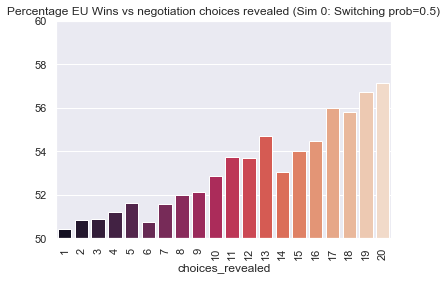

In [239]:
#plot count of wins according to k
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

percent_won=sim_df['wins']/(sim_df['wins']+sim_df['losses'])*100
#plt.subplots(figsize=(15,6))
sns.barplot(x=sim_df['choices_revealed'], y=percent_won,data=sim_df,palette='rocket')
plt.ylim(50, 60)
plt.xticks(rotation=90)
plt.title('Percentage EU Wins vs negotiation choices revealed (Sim 0: Switching prob=0.5)')
plt.savefig('Wins_choices_Sim0_switching05.png', bbox_inches='tight')
plt.show()

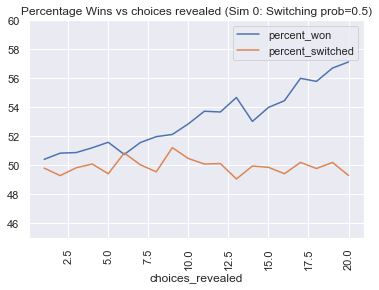

In [78]:
#plot switching and percentage wins for k
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

percent_won=sim_df['wins']/(sim_df['wins']+sim_df['losses'])*100
percent_switched=sim_df['switches']/(sim_df['stays']+sim_df['switches'])*100

#plt.subplots(figsize=(15,6))
sns.lineplot(x=sim_df['choices_revealed'], y=percent_won,palette='rocket',label="percent_won")
sns.lineplot(x=sim_df['choices_revealed'], y=percent_switched,label="percent_switched")

plt.ylim(45, 60)
plt.xticks(rotation=90)
plt.title('Percentage Wins vs choices revealed (Sim 0: Switching prob=0.5)')
plt.savefig('Wins_choices_switches.png', bbox_inches='tight')
#ax.legend()
plt.show()

#no clear bias between switching and winning accross k

In [57]:
sim0=df[(df['simulation_no'] == 0)]
sim0

,Unnamed: 0,choices_revealed,losses,simulation_no,stays,switches,wins
0,0,1,4959,0,5019,4981,5041
1,1,2,4916,0,5071,4929,5084
2,2,3,4912,0,5017,4983,5088
3,3,4,4879,0,4991,5009,5121
4,4,5,4841,0,5058,4942,5159
5,5,6,4925,0,4915,5085,5075
6,6,7,4843,0,4996,5004,5157
7,7,8,4802,0,5045,4955,5198
8,8,9,4787,0,4878,5122,5213
9,9,10,4714,0,4953,5047,5286


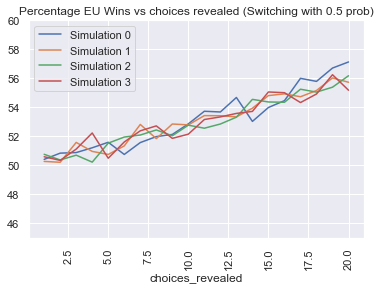

In [240]:
#plot switching and percentage wins for k in case where switching occurs with 0.5 probabiity
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

sim0=df[(df['simulation_no'] == 0)]
sim1=df[(df['simulation_no'] == 1)]
sim2=df[(df['simulation_no'] == 2)]
sim3=df[(df['simulation_no'] == 3)]

percent_won0=sim0['wins']/(sim0['wins']+sim0['losses'])*100
percent_won1=sim1['wins']/(sim1['wins']+sim1['losses'])*100
percent_won2=sim2['wins']/(sim2['wins']+sim2['losses'])*100
percent_won3=sim3['wins']/(sim3['wins']+sim3['losses'])*100


#plt.subplots(figsize=(15,6))
sns.lineplot(x=sim0['choices_revealed'], y=percent_won0,palette='rocket',label="Simulation 0")
sns.lineplot(x=sim1['choices_revealed'], y=percent_won1,palette='rocket',label="Simulation 1")
sns.lineplot(x=sim2['choices_revealed'], y=percent_won2,palette='rocket',label="Simulation 2")
sns.lineplot(x=sim3['choices_revealed'], y=percent_won3,palette='rocket',label="Simulation 3")


plt.ylim(45, 60)
plt.xticks(rotation=90)
plt.title('Percentage EU Wins vs choices revealed (Switching with 0.5 prob)')
plt.savefig('Wins_choices_switches_sims.png', bbox_inches='tight')

plt.show()



In [93]:
#simulate game where switching always occurs

#simulating 1000 iterations of games with 100 choices
#each iteration there is a 50/50 chance on whether stay or switch
#range of k values from 1 to 10
#compute number of wins and losses for each

from random import seed
from random import randint
import pandas as pd 

def simulate_game_switching(simulation_no):
    
    
    
    n=100 
    decision='Switch'
    #ks=[]
    #nums_won = [] 
    #nums_loss = []
    #nums_stay =[]
    #nums_switch=[]
    
    
    for k in range(1,21):
        
        num_won = 0 
        num_loss = 0
        num_stay =0
        num_switch=0
        
        for i in range(10000):
    
    
    
    #create dictionary of 
            choice_dict=initialize_game(n)
    
    #first choice
            player_first=first_choice(choice_dict)
    
    #monty opens, gives dictionary
            choice_dict=monty_opens(choice_dict,player_first,k)
    
    #win or lose
            result=final_decision(choice_dict, player_first, decision)
    
            if result == 'Won':
                num_won +=1
            
            else: 
                num_loss +=1
        
        print("Number of choices revealed: %s." % k)
        print("Number of stays: %s." % num_stay)
        print("Number of switches: %s." % num_switch)
        print("Number of wins: %s." % num_won)
        print("Number of losses: %s." % num_loss)
        ks.append(k)
        nums_won.append(num_won)
        nums_loss.append(num_loss)
        nums_stay.append(num_stay)
        nums_switch.append(num_switch)
        simulation_nos.append(simulation_no)
        
        
    


In [103]:
ks=[]
simulation_nos=[]
nums_won = [] 
nums_loss = []
nums_stay =[]
nums_switch=[]
simulate_game_switching(3)

Number of choices revealed: 1.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5050.
Number of losses: 4950.
Number of choices revealed: 2.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5127.
Number of losses: 4873.
Number of choices revealed: 3.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5165.
Number of losses: 4835.
Number of choices revealed: 4.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5194.
Number of losses: 4806.
Number of choices revealed: 5.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5227.
Number of losses: 4773.
Number of choices revealed: 6.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5379.
Number of losses: 4621.
Number of choices revealed: 7.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5353.
Number of losses: 4647.
Number of choices revealed: 8.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5392.
Number of losses: 4608.
Number of choices revealed: 9.
Number of

In [104]:


sim_switch_df= pd.DataFrame({'choices_revealed': ks,
                       'wins': nums_won,
                       'losses': nums_loss,
                       'stays': nums_stay,
                       'switches': nums_switch,
                       'simulation_no': simulation_nos
    
                       
                       })
sim_switch_df

,choices_revealed,losses,simulation_no,stays,switches,wins
0,1,4950,3,0,0,5050
1,2,4873,3,0,0,5127
2,3,4835,3,0,0,5165
3,4,4806,3,0,0,5194
4,5,4773,3,0,0,5227
5,6,4621,3,0,0,5379
6,7,4647,3,0,0,5353
7,8,4608,3,0,0,5392
8,9,4498,3,0,0,5502
9,10,4464,3,0,0,5536


In [105]:
#write third df to csv
sim_switch_df.to_csv('simulation_switch_3.csv')

In [106]:
#aggregate all 4 switch simulations to
#read in csv
import pandas as pd 

#collect and aggregate Simulation 1 Results
simswitch_df=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_switch_0.csv')
simswitch_df1=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_switch_1.csv')
simswitch_df2=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_switch_2.csv')

simswitch_df3=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_switch_3.csv')


a=simswitch_df.append(simswitch_df1)
b=a.append(simswitch_df2)
df_switch=b.append(simswitch_df3)
df_switch

,Unnamed: 0,choices_revealed,losses,simulation_no,stays,switches,wins
0,0,1,5038,0,0,0,4962
1,1,2,4931,0,0,0,5069
2,2,3,4805,0,0,0,5195
3,3,4,4817,0,0,0,5183
4,4,5,4655,0,0,0,5345
5,5,6,4784,0,0,0,5216
6,6,7,4688,0,0,0,5312
7,7,8,4511,0,0,0,5489
8,8,9,4491,0,0,0,5509
9,9,10,4541,0,0,0,5459


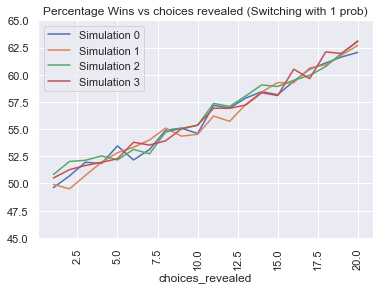

In [110]:
#plot switching and percentage wins for k in case where switching occurs with 0.5 probabiity
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

sim0=df_switch[(df_switch['simulation_no'] == 0)]
sim1=df_switch[(df_switch['simulation_no'] == 1)]
sim2=df_switch[(df_switch['simulation_no'] == 2)]
sim3=df_switch[(df_switch['simulation_no'] == 3)]

percent_won0sw=sim0['wins']/(sim0['wins']+sim0['losses'])*100
percent_won1sw=sim1['wins']/(sim1['wins']+sim1['losses'])*100
percent_won2sw=sim2['wins']/(sim2['wins']+sim2['losses'])*100
percent_won3sw=sim3['wins']/(sim3['wins']+sim3['losses'])*100


#plt.subplots(figsize=(15,6))
sns.lineplot(x=sim0['choices_revealed'], y=percent_won0sw,palette='rocket',label="Simulation 0")
sns.lineplot(x=sim1['choices_revealed'], y=percent_won1sw,palette='rocket',label="Simulation 1")
sns.lineplot(x=sim2['choices_revealed'], y=percent_won2sw,palette='rocket',label="Simulation 2")
sns.lineplot(x=sim3['choices_revealed'], y=percent_won3sw,palette='rocket',label="Simulation 3")


plt.ylim(45, 65)
plt.xticks(rotation=90)
plt.title('Percentage Wins vs choices revealed (Switching with 1 prob)')
plt.savefig('Wins_choices_switching_sims.png')
#ax.legend()
plt.show()



In [202]:
#simulate game where no switching ever occurs

#simulating 1000 iterations of games with 100 choices
#each iteration there is a 50/50 chance on whether stay or switch
#range of k values from 1 to 10
#compute number of wins and losses for each

from random import seed
from random import randint
import pandas as pd 

def simulate_game_NOswitching(simulation_no):

    
    n=100 
    decision='Stay'
    
    
    
    for k in range(1,21):
        
        num_won = 0 
        num_loss = 0
        num_stay =0
        num_switch=0
        
        for i in range(10000):
    
    
    
    #create dictionary of 
            choice_dict=initialize_game(n)
    
    #first choice
            player_first=first_choice(choice_dict)
    
    #monty opens, gives dictionary
            choice_dict=monty_opens(choice_dict,player_first,k)
    
    #win or lose
            result=final_decision(choice_dict, player_first, decision)
    
            if result == 'Won':
                num_won +=1
            
            else: 
                num_loss +=1
        
        print("Number of choices revealed: %s." % k)
        print("Number of stays: %s." % num_stay)
        print("Number of switches: %s." % num_switch)
        print("Number of wins: %s." % num_won)
        print("Number of losses: %s." % num_loss)
        ks.append(k)
        nums_won.append(num_won)
        nums_loss.append(num_loss)
        nums_stay.append(num_stay)
        nums_switch.append(num_switch)
        simulation_nos.append(simulation_no)
        
        
    


In [214]:
ks=[]
simulation_nos=[]
nums_won = [] 
nums_loss = []
nums_stay =[]
nums_switch=[]
simulate_game_NOswitching(3)

Number of choices revealed: 1.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5007.
Number of losses: 4993.
Number of choices revealed: 2.
Number of stays: 0.
Number of switches: 0.
Number of wins: 4896.
Number of losses: 5104.
Number of choices revealed: 3.
Number of stays: 0.
Number of switches: 0.
Number of wins: 4953.
Number of losses: 5047.
Number of choices revealed: 4.
Number of stays: 0.
Number of switches: 0.
Number of wins: 4983.
Number of losses: 5017.
Number of choices revealed: 5.
Number of stays: 0.
Number of switches: 0.
Number of wins: 4979.
Number of losses: 5021.
Number of choices revealed: 6.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5036.
Number of losses: 4964.
Number of choices revealed: 7.
Number of stays: 0.
Number of switches: 0.
Number of wins: 5031.
Number of losses: 4969.
Number of choices revealed: 8.
Number of stays: 0.
Number of switches: 0.
Number of wins: 4986.
Number of losses: 5014.
Number of choices revealed: 9.
Number of

In [215]:
sim_NOswitch_df= pd.DataFrame({'choices_revealed': ks,
                       'wins': nums_won,
                       'losses': nums_loss,
                       'stays': nums_stay,
                       'switches': nums_switch,
                       'simulation_no': simulation_nos
    
                       
                       })
sim_NOswitch_df

,choices_revealed,losses,simulation_no,stays,switches,wins
0,1,4993,3,0,0,5007
1,2,5104,3,0,0,4896
2,3,5047,3,0,0,4953
3,4,5017,3,0,0,4983
4,5,5021,3,0,0,4979
5,6,4964,3,0,0,5036
6,7,4969,3,0,0,5031
7,8,5014,3,0,0,4986
8,9,4943,3,0,0,5057
9,10,4958,3,0,0,5042


In [216]:
sim_NOswitch_df.to_csv('simulation_NOswitch_3.csv')

In [217]:
#collect and aggregate NO switching results
#collect and aggregate Simulation 1 Results
simNOswitch_df=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_NOswitch_0.csv')
simNOswitch_df1=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_NOswitch_1.csv')
simNOswitch_df2=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_NOswitch_2.csv')

simNOswitch_df3=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2019Posts/March/MontyHall/Code/simulation_NOswitch_3.csv')


a=simNOswitch_df.append(simNOswitch_df1)
b=a.append(simNOswitch_df2)
df_NOswitch=b.append(simNOswitch_df3)
df_NOswitch

,Unnamed: 0,choices_revealed,losses,simulation_no,stays,switches,wins
0,0,1,4954,0,0,0,5046
1,1,2,4982,0,0,0,5018
2,2,3,4991,0,0,0,5009
3,3,4,5006,0,0,0,4994
4,4,5,4854,0,0,0,5146
5,5,6,4935,0,0,0,5065
6,6,7,5049,0,0,0,4951
7,7,8,5045,0,0,0,4955
8,8,9,4977,0,0,0,5023
9,9,10,4921,0,0,0,5079


In [231]:
(sim_percent_switch_won['choices_revealed']).astype(int)

reveals
1      1
2      2
3      3
4      4
5      5
6      6
7      6
8      8
9      9
10    10
11    11
12    12
13    13
14    13
15    15
16    16
17    17
18    18
19    19
20    20
Name: choices_revealed, dtype: int64

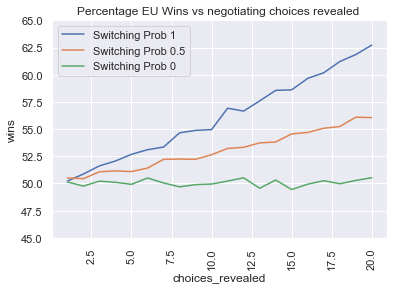

In [238]:
#comparison of simulation
#sim_percentwon=pd.DataFrame(df.groupby("choices_revealed")["wins"].mean()/10000*100)
dfa=df
dfa['reveals']=dfa['choices_revealed']
sim_percentwon=pd.DataFrame(dfa.groupby(['reveals']).mean()/10000*100)
sim_percentwon['choices_revealed']=sim_percentwon['choices_revealed']*100

dfb=df_switch
dfb['reveals']=dfb['choices_revealed']
sim_percent_switch_won=pd.DataFrame(dfb.groupby(['reveals']).mean()/10000*100)
sim_percent_switch_won['choices_revealed']=sim_percent_switch_won['choices_revealed']*100


dfc=df_NOswitch
dfc['reveals']=dfc['choices_revealed']
sim_percent_NOswitch_won=pd.DataFrame(dfc.groupby(['reveals']).mean()/10000*100)
sim_percent_NOswitch_won['choices_revealed']=sim_percent_NOswitch_won['choices_revealed']*100

sns.lineplot(x=sim_percent_switch_won['choices_revealed'], y=sim_percent_switch_won['wins'],palette='rocket',label="Switching Prob 1")
sns.lineplot(x=sim_percentwon['choices_revealed'], y=sim_percentwon['wins'],palette='rocket',label="Switching Prob 0.5")
sns.lineplot(x=sim_percent_NOswitch_won['choices_revealed'], y=sim_percent_NOswitch_won['wins'],palette='rocket',label="Switching Prob 0")


plt.ylim(45, 65)
plt.xticks(rotation=90)
plt.title('Percentage EU Wins vs negotiating choices revealed ')
plt.savefig('Summary_chart.png', bbox_inches='tight')

plt.show()

In [248]:
#sim_percentwon=pd.DataFrame(dfa.groupby(['reveals']).mean()/10000*100)

#sim_percent_switch_won=pd.DataFrame(dfb.groupby(['reveals']).mean()/10000*100)

#

#sim_percent_switch_won
#sim_percentwon
#sim_percent_switch_won
#sim_percent_NOswitch_won
sim_percentwon

,Unnamed: 0,choices_revealed,losses,simulation_no,stays,switches,wins
reveals,,,,,,,
1,0.00,1.0,49.4925,0.015,50.1600,49.8400,50.5075
2,0.01,2.0,49.5600,0.015,49.7725,50.2275,50.4400
3,0.02,3.0,48.9300,0.015,50.1825,49.8175,51.0700
4,0.03,4.0,48.8450,0.015,50.4650,49.5350,51.1550
5,0.04,5.0,48.9100,0.015,49.7625,50.2375,51.0900
6,0.05,6.0,48.5875,0.015,49.4800,50.5200,51.4125
7,0.06,7.0,47.7850,0.015,49.8400,50.1600,52.2150
8,0.07,8.0,47.7550,0.015,50.0425,49.9575,52.2450
9,0.08,9.0,47.7800,0.015,49.3575,50.6425,52.2200
